In [ ]:
import numpy as np

In [1]:
# Simulating a GARCH(1, 1) process

np.random.seed(2)

a0 = 0.2
a1 = 0.5
b1 = 0.3

n = 10000
w = np.random.normal(size=n)
eps = np.zeros_like(w)
sigsq = np.zeros_like(w)

for i in range(1, n):
    sigsq[i] = a0 + a1*(eps[i-1]**2) + b1*sigsq[i-1]
    eps[i] = w[i] * np.sqrt(sigsq[i])

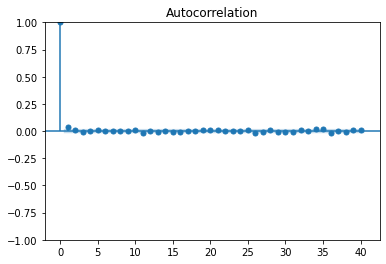

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(eps)
plt.show()

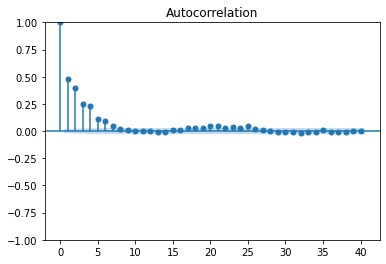

In [5]:
# Si noti che la serie sembra la realizzazione di un processo di rumore bianco discreto
# Tuttavia, se tracciamo il correlogramma del quadrato della serie vediamo che si tratta sostanzialmente di un processo condizionalmente eteroschedastico 
# attraverso il decadimento di ritardi successivi
plot_acf(eps**2)
plt.show()

In [6]:
#proviamo ad adattare un modello GARCH a questa serie simulata in modo da verificare se otteniamo gli stessi parametri della seria simulata.
# Fit a GARCH(1, 1) model to our simulated EPS series
# We use the arch_model function from the ARCH package

from arch import arch_model

am = arch_model(eps)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     34,   Neg. LLF: 13129.790134449831
Iteration:     10,   Func. Count:     62,   Neg. LLF: 12237.312781716888
Optimization terminated successfully    (Exit mode 0)
            Current function value: 12237.303267318712
            Iterations: 13
            Function evaluations: 76
            Gradient evaluations: 13
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -12237.3
Distribution:                  Normal   AIC:                           24482.6
Method:            Maximum Likelihood   BIC:                           24511.4
                                        No. Observations:                10000
Date:                Wed, Jul 13 2022   Df Residuals:                     9999
Time:       

In [7]:
#Possiamo vedere che i parametri veri rientrano tutti nei rispettivi intervalli di confidenza.